In [1]:
!pip install segyio

     |████████████████████████████████| 83 kB 1.7 MB/s 


In [24]:
from google.colab import drive
drive.mount("home/")

Mounted at home/


In [25]:
import numpy as np
import segyio
import matplotlib.pyplot as plt


In [30]:
# helper function to easily load .sgy images
def load_segy(file_name):
  with segyio.open(file_name, ignore_geometry=True) as file:
    n_traces = file.tracecount
    sample_rate = segyio.tools.dt(file)/1000
    n_samples = file.samples.size
    time = file.samples
    amplitude = file.trace.raw[:]
    return n_traces, n_samples, sample_rate, time, amplitude

In [33]:
# import os
# print(os.listdir("home/MyDrive/inf1310/"))
file_path = "home/MyDrive/inf1310/f3_seismic_with_null_traces.sgy"
n_traces, n_samples, dt_samples, time_axis, data = load_segy(file_path)
# n_inlines and n_crosslines were fetched from the internet
n_inlines = 651
n_crosslines = 951
# here we are reshaping the 2D data inside 'data' to a 3D volume 'vol'
vol = data.reshape((n_inlines, n_crosslines, n_samples))
print(vol.shape)
# we transformed our 2D data into a 3D volume with
# we have a matrix with 651 images, each image with 951 traces, with 463 samples

(651, 951, 463)


In [34]:
# it would be interesting to 'see' a sample of the 3D volume we just created
# so let's take a sample from the exact middle of the volume and plot it

my_inline = n_inlines//2
my_crossline = n_crosslines//2
my_timeline = n_samples//2
my_inline_section = vol[my_inline,:,:]
my_crossline_section = vol[:,my_crossline,:]
my_timeline_section = vol[:,:,my_timeline]

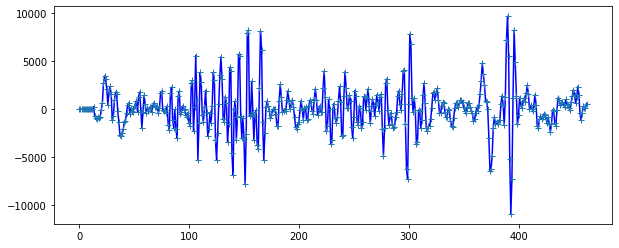

In [36]:
# ploting the data

x_axis_limits = np.linspace(0, n_samples-1, n_samples)
trace1 = my_inline_section[my_crossline, :]
trace2 = my_crossline_section[my_inline, :]
plt.figure(figsize=(10,4))
plt.plot(x_axis_limits, trace1, "b")
plt.plot(x_axis_limits, trace2, "+")
plt.show()
# here we are ploting the inline values and crossline values
# we can observe that since we are choosing the same "spot" (the middle)
# both graphs look the same, because we are plotting the same trace
# we are only changing the root data

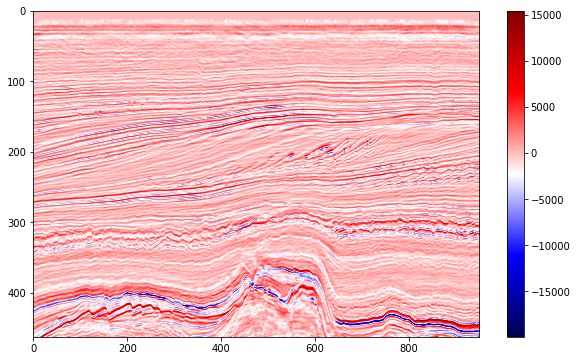

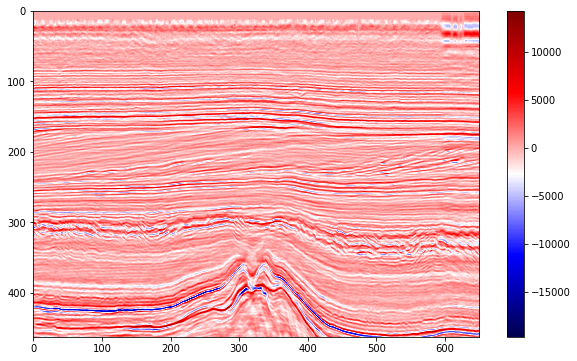

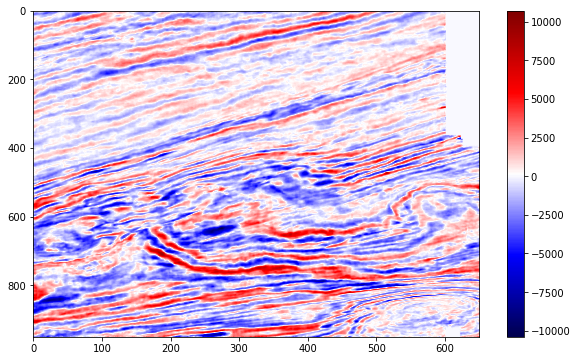

In [38]:
# lets observe the middle session we chose from the different
# angles that it was captured
def show_img(img, map):
  plt.figure(figsize=(10, 6))
  plt.imshow(img, cmap=map, aspect="auto")
  plt.colorbar()
  plt.show()

show_img(my_inline_section.T, "seismic")
show_img(my_crossline_section.T, "seismic")
show_img(my_timeline_section.T, "seismic")

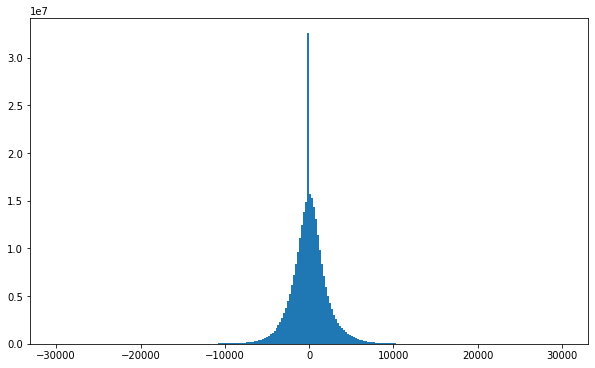

In [39]:
# lets investigate the histogram values of the whole volume
# we will observe some data points we're miss represented which is normal
# but we should make sure to get rid of these data taints so we can fully trust
# our data

def show_hist(data):
  plt.figure(figsize=(10, 6))
  plt.hist(data.ravel(), 256)
  plt.show()

show_hist(vol) 

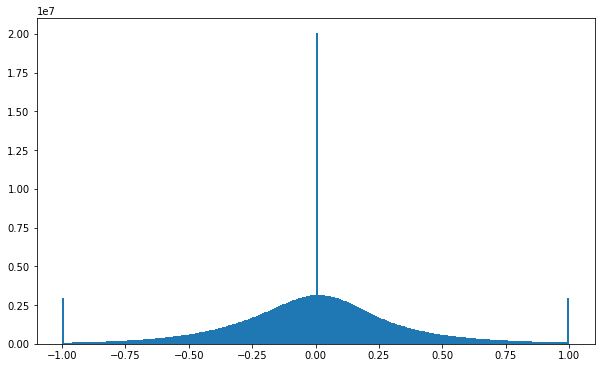

In [40]:
# let's normalize the data taints
# one solution is to use the percentiles of the data
p1, p99 = np.percentile(vol.ravel(), (1, 99))
factor = np.amax(np.abs([p1, p99]))
# get the highest values from p1 and p2 and normalize our volume:
volp = vol/factor
volp[volp>1] = 1
volp[volp<-1]= -1
show_hist(volp)

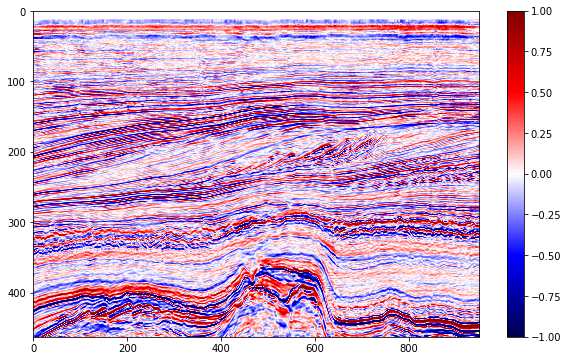

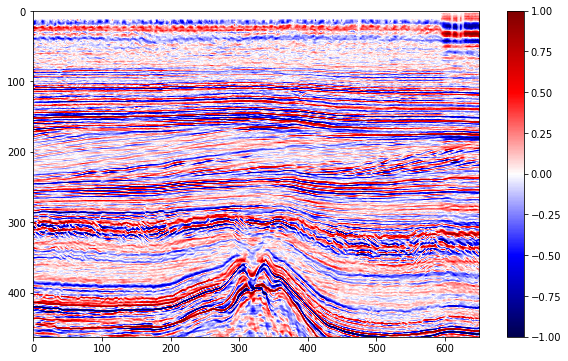

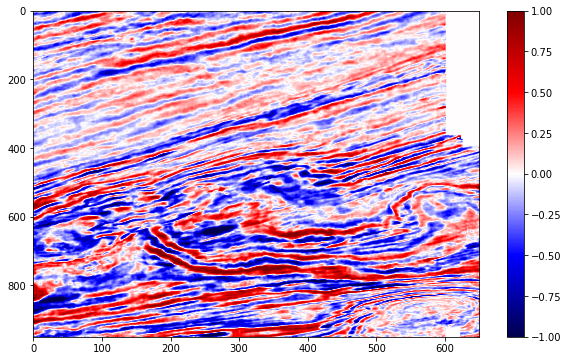

In [42]:
# now we can better observe our seismic images
show_img(volp[my_inline,:,:].T, "seismic")
show_img(volp[:,my_crossline,:].T, "seismic")
show_img(volp[:,:,my_timeline].T, "seismic")

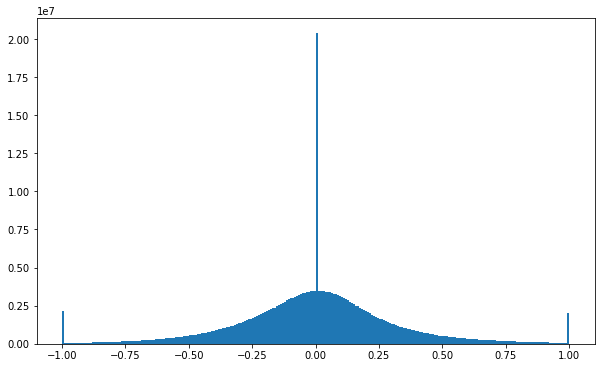

In [43]:
# a cheaper solution computationally is to use the standard deviation
s3 = 3*np.std(vol)
vols = vol/s3
vols[vols>1]=1
vols[vols<-1]=-1
show_hist(vols)